In [1]:
#import the libraries we used
import skimage.io as skio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\asus\AppData\Local\Temp\ipykernel_15844\2151917237.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
# readout noise and mean bias level from bias images for selected region
ron_bias, mean_bias_level = [],[]
for i in range(10):
    bias = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/bias/bias-{i+1}.tiff", plugin="tifffile")
    std_bias, mean_bias = np.std(bias[100:300,100:300]), np.mean(bias[100:300,100:300])
    ron_bias.append(std_bias)
    mean_bias_level.append(mean_bias)
print(f"the readout noise = {np.round(np.mean(ron_bias),3)} \u00B1 {np.round(np.std(ron_bias),3)} ADU")
print(f"the mean bias level = {np.round(np.mean(mean_bias_level),3)} \u00B1 {np.round(np.std(mean_bias_level),3)} ADU")

the readout noise = 2.891 ± 0.005 ADU
the mean bias level = 99.563 ± 0.053 ADU


In [3]:
# making a mean row and column for median stacked bias images aka masterbias
masterbias = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/masterbias.tiff", plugin="tifffile")
df = pd.DataFrame(masterbias)
mean_column_bias, mean_row_bias = [], []
for column in df:
    mean_column_bias.append(np.mean(df[column]))
df1 = pd.DataFrame.transpose(df)
for row in df1:
    mean_row_bias.append(np.mean(df1[row]))

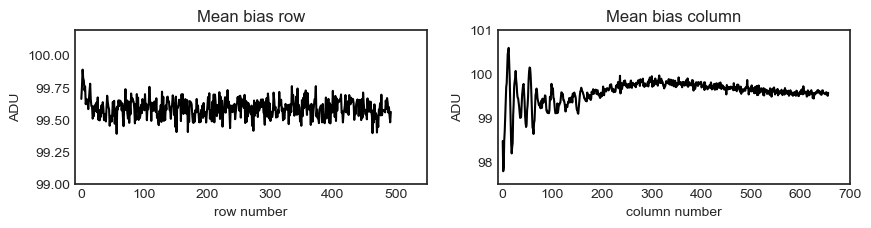

In [4]:
x = np.linspace(0,656,656)
x1 = np.linspace(0,492,492)
fig, ax = plt.subplots(1,2,figsize=(10,2))
#fig.subplots_adjust(hspace=0.7)
ax[0].plot(x1,mean_row_bias,'k')
ax[0].set(title="Mean bias row", xlabel='row number',ylabel='ADU', xlim=(-10,550), ylim=(99,100.2))
ax[1].plot(x,mean_column_bias,'k')
ax[1].set(title="Mean bias column", xlabel='column number', ylabel='ADU', xlim=(-10,700), ylim=(97.5,101))
plt.savefig("ALTS-Mean bias row and column.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

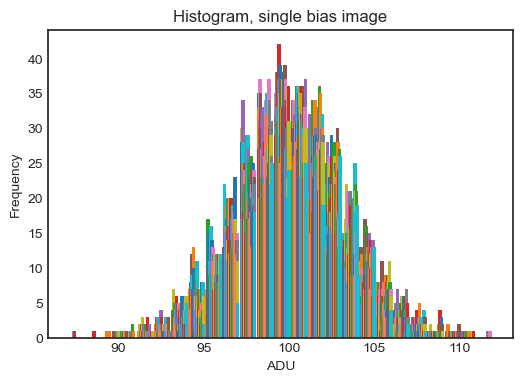

In [5]:
data = bias[100:300,100:300]
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(data,bins=np.arange(data.min(), data.max()+1), width=0.2)
ax.set(title='Histogram, single bias image', xlabel="ADU", ylabel='Frequency')
plt.savefig("ALTS-histogram single bias.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

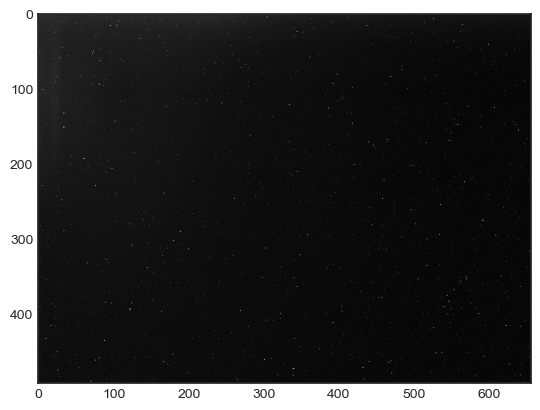

In [6]:
#check the flat frame, select a region with low std and minimal hot pixel/traps
f1 = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/flat dark variasi/flat-60s-1.tiff", plugin="tifffile")
a=f1
plt.imshow(a, cmap='gray', norm='linear')

In [7]:
#make an array for the mean counts, half variance, and exp time
exp_time = [1,2,3,4,5,6,9,12,20,25,30,40,45,50,55,60]

In [8]:
mean_count = []
#extract the mean counts from flat frames for selected region
for i, n in enumerate(exp_time):
    for z in range(1):
        flatawal = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/flat dark variasi/flat-{n}s-1.tiff", plugin="tifffile")
        mean_flat = np.mean(flatawal[100:300,100:300])
        mean_count.append(mean_flat)
print(mean_count)
print(len(mean_count))

[101.22335, 103.678775, 106.078325, 108.0489, 110.32895, 112.5799, 120.0779, 127.6894, 147.16185, 159.0196, 170.830175, 194.24075, 205.67725, 217.2898, 229.099475, 240.683525]
16


In [9]:
variance_flat = []
#extract the half variance of substracted flat frames
for i, n in enumerate(exp_time):
    for z in range(1):
        flatawal = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/flat dark variasi/flat-{n}s-1.tiff", plugin="tifffile")
        flatakhir = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/flat dark variasi/flat-{n}s-2.tiff", plugin="tifffile")
        substract_flat = (np.array(flatawal[100:300,100:300], dtype=float)) - (np.array(flatakhir[100:300,100:300], dtype=float))
        var_flat = (np.var(np.abs(substract_flat))) *0.5
        variance_flat.append(var_flat)
print(variance_flat)
print(len(variance_flat))

[3.6159112487499994, 4.1534557121875, 4.667048498750001, 5.231623199687499, 5.872623197187501, 6.5000893046875, 9.277841520000003, 9.780991755, 14.63579538875, 17.704086242187504, 20.768266218750004, 26.853468795000005, 28.6117586796875, 32.477873672187506, 36.37804372, 38.34932920968749]
16


In [10]:
#make a dataframe for the data to plot
data = {'exp time': exp_time, 'mean counts': mean_count, 'half variance': variance_flat}
df = pd.DataFrame(data)
df

,exp time,mean counts,half variance
0,1,101.223350,3.615911
1,2,103.678775,4.153456
2,3,106.078325,4.667048
3,4,108.048900,5.231623
4,5,110.328950,5.872623
5,6,112.579900,6.500089
6,9,120.077900,9.277842
7,12,127.689400,9.780992
8,20,147.161850,14.635795
9,25,159.019600,17.704086


Gradient of the slope = 0.249
The y-intercept = -21.663


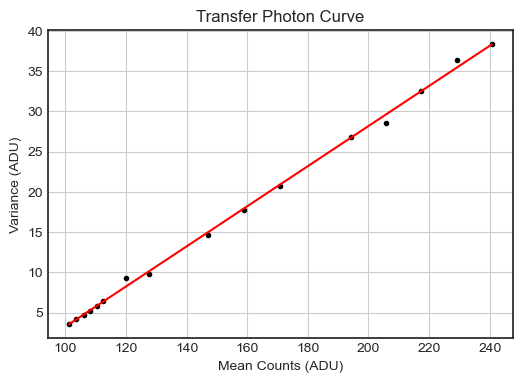

In [11]:
#linear regression for the transfer photon curve
from sklearn.linear_model import LinearRegression

#select mean counts as x and half variance as y
x = df['mean counts'].values.reshape(-1,1)
y = df['half variance'].values.reshape(-1,1)

#fit the data
model = LinearRegression()
model.fit(x,y)
y_predict = model.predict(x)

#plot the data
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x,y,c='k',marker='.')
ax.plot(x,y_predict,'r-')
ax.set(title='Transfer Photon Curve', xlabel='Mean Counts (ADU)', ylabel='Variance (ADU)')
ax.grid()

#define the coefficient and intercept of y
coef_slope = model.coef_[0,0]
const_y = model.intercept_[0]

#print the results
print(f'Gradient of the slope = {np.round(coef_slope,3)}')
print(f'The y-intercept = {np.round(const_y,3)}')
#save the figure
plt.savefig("ALTS-Transfer Photon Curve.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [12]:
#define the formula for the ccd parameter from the photon transfer curve
conv_fact = 1/coef_slope #the conversion factor or Gain formula
adc_value = 2**12 #12 bit of A/D Converter
readout_noise = np.sqrt(np.abs(const_y)) / coef_slope #readout noise formula
full_well = (adc_value-1) / coef_slope #full well capacity formula
d_r = full_well / readout_noise #dynamic range formula
enob = np.log10(d_r)/np.log10(2) #effective number of bit formula
d_r_db = 20 * np.log10(d_r) #dynamic range in dB
ron = np.mean(ron_bias) * conv_fact
#print the result
print('Parameter of the CCD')
print(f'Conversion factor or Gain = {np.round(conv_fact,3)} e-/ADU')
print(f'Readout Noise from Transfer Photon Curve = {np.round(readout_noise,3)} e-/px')
print(f'Readout Noise from a bias image = {np.round(ron,3)} e-/px')
print(f'Full Well Capacity = {np.round(full_well,0)} e-')
print(f'Dynamic Range = {np.round(d_r,2)}')
print(f'Dynamic Range in dB = {np.round(d_r_db,1)} dB')
print(f'Effective Number of Bit = {np.round(enob,0)} bit')

Parameter of the CCD
Conversion factor or Gain = 4.013 e-/ADU
Readout Noise from Transfer Photon Curve = 18.677 e-/px
Readout Noise from a bias image = 11.601 e-/px
Full Well Capacity = 16432.0 e-
Dynamic Range = 879.83
Dynamic Range in dB = 58.9 dB
Effective Number of Bit = 10.0 bit


The Gradient of the Slope = 2.372
R Square = 0.9999117786300388


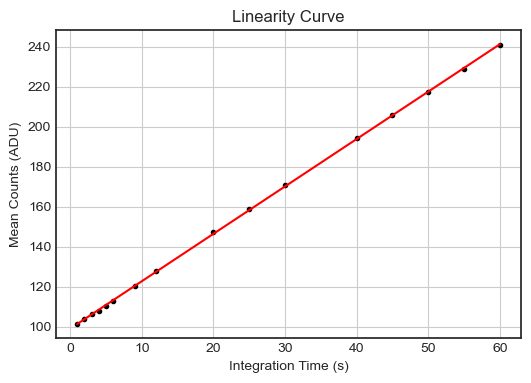

In [13]:
#linear regression for the linearity curves
#exp time as x and mean counts as y
xb = df['exp time'].values.reshape(-1,1)
yb = df['mean counts'].values.reshape(-1,1)

#fit the data
model = LinearRegression()
model.fit(xb,yb)
y_predict = model.predict(xb)

#plot the data
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(xb,yb,c='k',marker='.')
ax.plot(xb,y_predict,'r-')
ax.set(title='Linearity Curve', xlabel='Integration Time (s)', ylabel='Mean Counts (ADU)')
ax.grid()

#define the coefficient and intercept of y
coef = model.coef_[0,0]
print(f'The Gradient of the Slope = {np.round(coef,3)}')
print(f'R Square = {model.score(xb,yb)}')
plt.savefig("ALTS-Linearity Curve.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [14]:
#array for the dark current
dark_current, dark_current_region = [], []
exp_time = [1,2,3,4,5,6,9,12,20,25,30,40,45,55,60]
#calculate the mean of dark frames
for i, n in enumerate(exp_time):
    for z in range(1):
        dark_image = skio.imread(f"D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/flat dark variasi/dark-{n}s-1.tiff", plugin="tifffile")
        mean_dark = np.mean(dark_image)
        dark_reg = np.mean(dark_image[100:300,100:300])
        dark_current.append(mean_dark)
        dark_current_region.append(dark_reg)
print(dark_current)
print(len(dark_current))

[100.54399353063653, 101.87927572873289, 103.28352419194924, 104.44800961729129, 105.68103683323419, 106.98290638013087, 110.95904595478882, 115.0711598998612, 125.18834585068412, 131.6495885385683, 138.28072018143962, 150.5683403975808, 157.15087435554233, 169.5928483789411, 175.89296735574064]
15


In [15]:
#make a dataframe
data2 = {'exp time': exp_time, 'mean dark count': dark_current, 'mean dark region': dark_current_region}
df2 = pd.DataFrame(data2)
df2

,exp time,mean dark count,mean dark region
0,1,100.543994,100.845600
1,2,101.879276,102.914500
2,3,103.283524,104.967000
3,4,104.448010,106.634950
4,5,105.681037,108.448675
5,6,106.982906,110.351900
6,9,110.959046,116.449125
7,12,115.071160,122.940825
8,20,125.188346,138.389000
9,25,131.649589,148.566400


Gradient of the slope = 1.2789413551771218
Intercept = 99.44988184026498
R Square = 0.9999339273079105


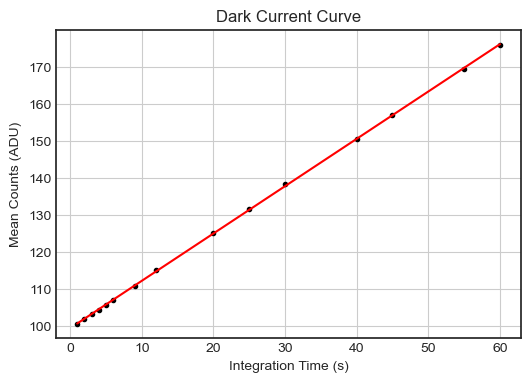

In [16]:
#linear regression for the dark current
xc = df2['exp time'].values.reshape(-1,1)
yc = df2['mean dark count'].values.reshape(-1,1)

#fit the data
model = LinearRegression()
model.fit(xc,yc)
y_predict_c = model.predict(xc)

#plot the data
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(xc,yc,c='k',marker='.')
ax.plot(xc,y_predict_c,'r-')
ax.set(title='Dark Current Curve', xlabel='Integration Time (s)', ylabel='Mean Counts (ADU)')
ax.grid()

#define coef
coef_dark = model.coef_[0,0]
intercept_y_dark = model.intercept_[0]
print(f'Gradient of the slope = {coef_dark}')
print(f'Intercept = {intercept_y_dark}')
print(f'R Square = {model.score(xc,yc)}')
plt.savefig("ALTS-Dark Current Curve.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

In [17]:
dark_cur = coef_dark * conv_fact #dark current formula
bias_lev = intercept_y_dark * dark_cur #bias level formula

#print the result
print(f'Dark Current of the CCD = {np.round(dark_cur,3)} e-/s/pix')
print(f'Bias Level = {np.round(bias_lev,3)} e-/pix')

Dark Current of the CCD = 5.132 e-/s/pix
Bias Level = 510.383 e-/pix


In [18]:
#make a contour for dark images
dark_30s = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/flat dark variasi/dark-30s-1.tiff", plugin="tifffile")
dark_60s = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/flat dark variasi/dark-60s-1.tiff", plugin="tifffile")
df4 = pd.DataFrame(dark_30s)
df5 = pd.DataFrame(dark_60s)

In [19]:
x0 = np.linspace(0,656,656)
y0 = np.linspace(0,492,492)
X, Y = np.meshgrid(x0,y0)

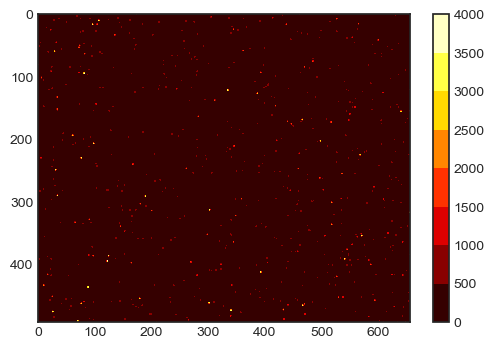

In [20]:
fig, ax = plt.subplots(figsize=(6,4))
cp = ax.contourf(X,Y, df4, cmap='hot', alpha=1)
fig.colorbar(cp) 
ax.set(ylim=(492,0))
plt.savefig("ALTS-Countour Dark 30s.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

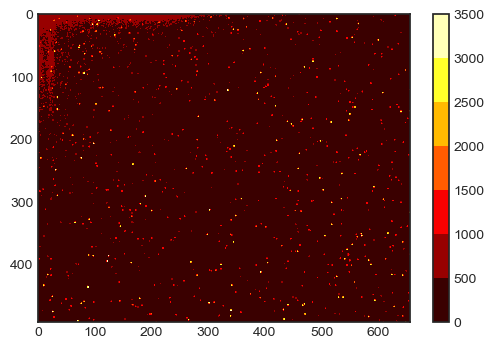

In [21]:
fig, ax = plt.subplots(figsize=(6,4))
cp = ax.contourf(X,Y, df5, cmap='hot', alpha=1)
fig.colorbar(cp) 
ax.set(ylim=(492,0))
plt.savefig("ALTS-Countour Dark 60s.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

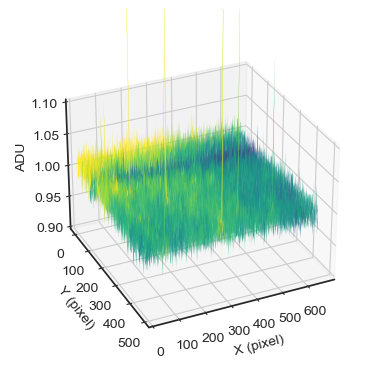

<Figure size 640x480 with 0 Axes>

In [22]:
#plot surface and contour for flat frames
from matplotlib.ticker import LinearLocator

flat_variasi = skio.imread("D:/KULIAH/Data Observasi/karakter altsss/2023-01-23/masterflat_variasi.tiff", plugin="tifffile")
df6 = pd.DataFrame(flat_variasi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.
Z = df6

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,cmap='viridis', linewidth=1, vmax=1.01)
#fig.colorbar(surf, shrink=0.4, aspect=10)
# Customize the axis and label
ax.set(xlabel='X (pixel)', ylabel='Y (pixel)', xlim=(692,0),zlim=(0.9,1.1))
ax.set_zlabel('ADU', rotation='vertical')
ax.view_init(30, 65, 0)
ax.set_box_aspect(None, zoom=0.85)
plt.show()
plt.savefig("ALTS-Surface Masterflat.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)

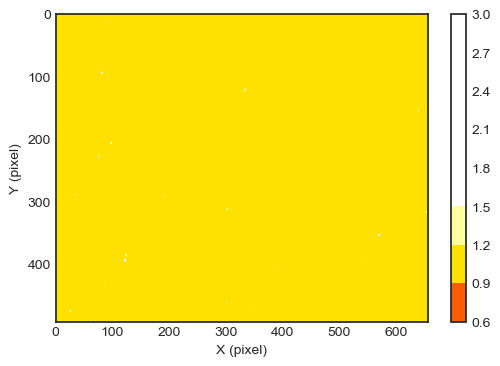

In [23]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
cp = ax.contourf(X, Y, Z, cmap='hot', vmin=0, vmax=1.5)
fig.colorbar(cp)
ax.set(ylim=(492,0), xlabel='X (pixel)', ylabel='Y (pixel)')
plt.savefig("ALTS-Countour Masterflat.jpg", dpi=300, bbox_inches='tight',pad_inches=0.1)